In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel(r"C:\Users\abhis\OneDrive\Desktop\customer_churn_large_dataset.xlsx")
df.head(5)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [5]:
df.shape

(100000, 9)

<AxesSubplot: >

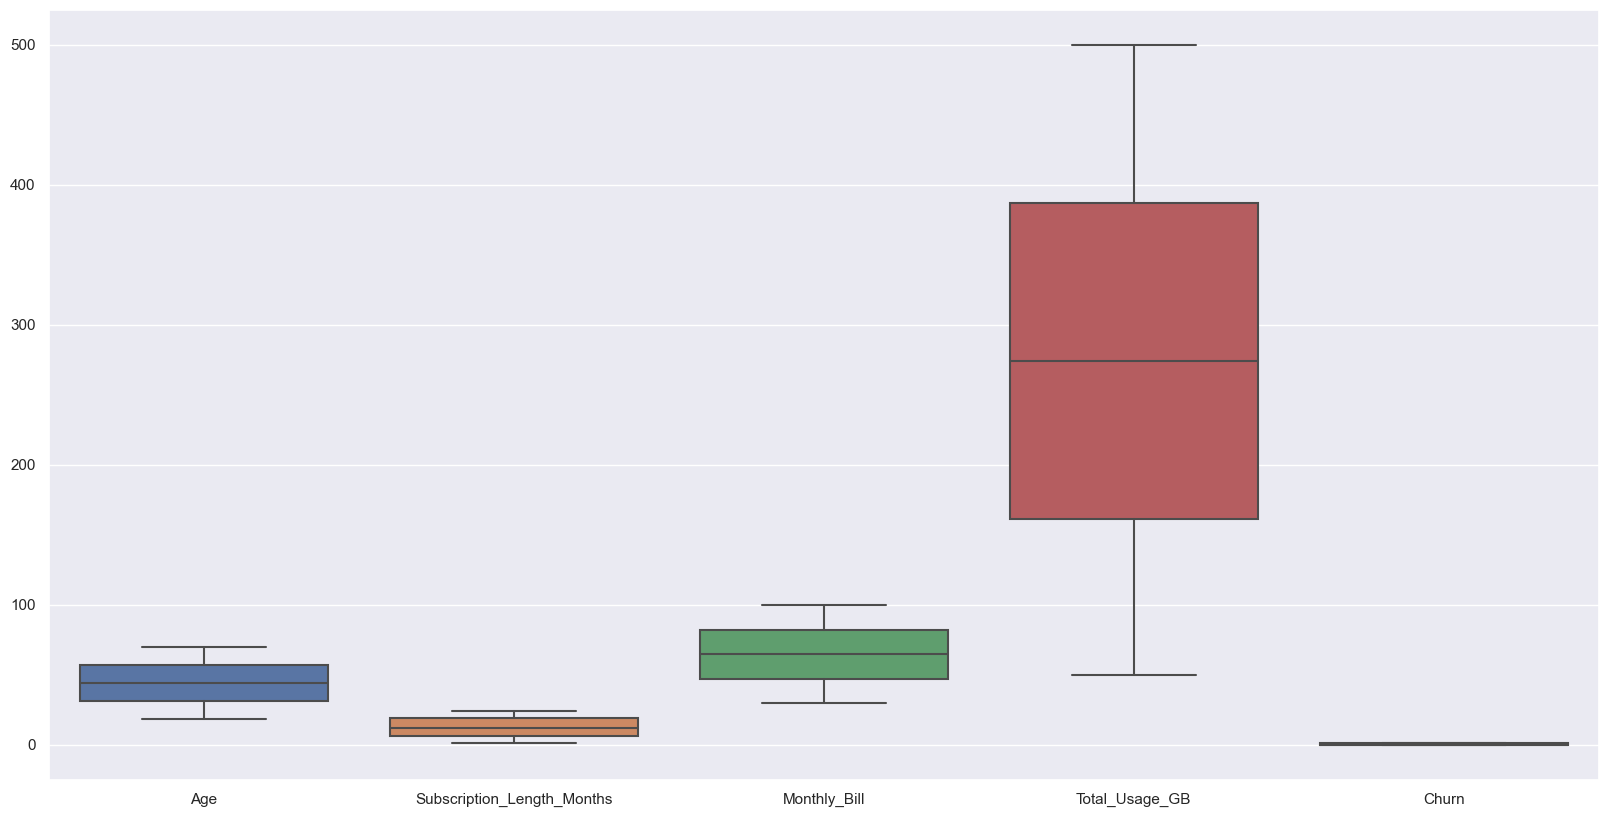

In [33]:
sns.boxplot(df.drop(['CustomerID'],axis=1))

<AxesSubplot: xlabel='Location', ylabel='Count'>

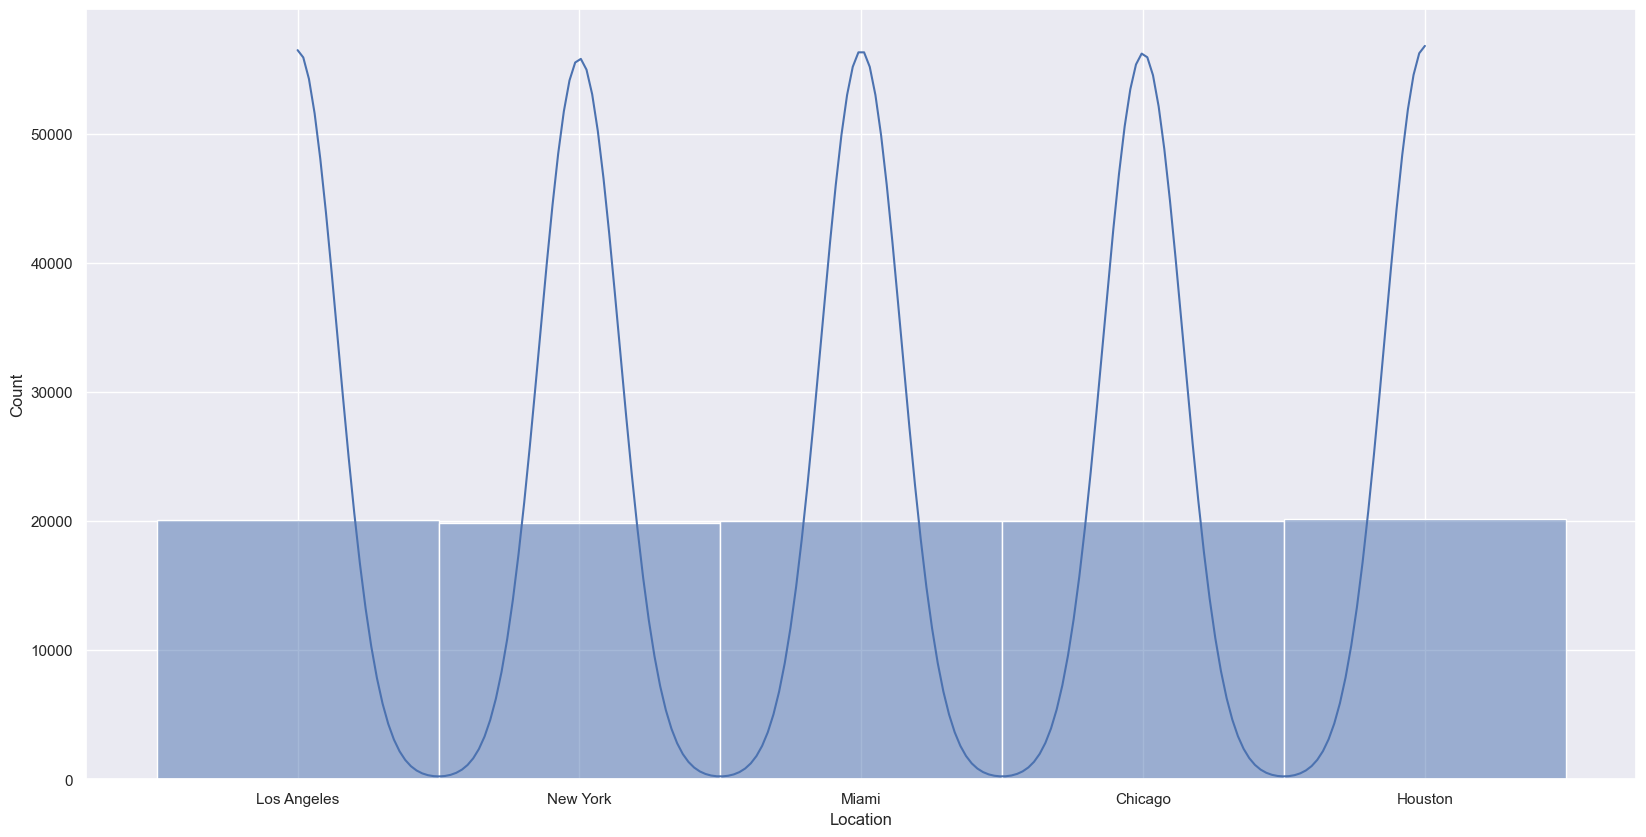

In [34]:
sns.histplot(data=df.Location, kde=True)

C:\Users\abhis\AppData\Local\Temp\ipykernel_19604\3803735512.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(),annot=True)


<AxesSubplot: >

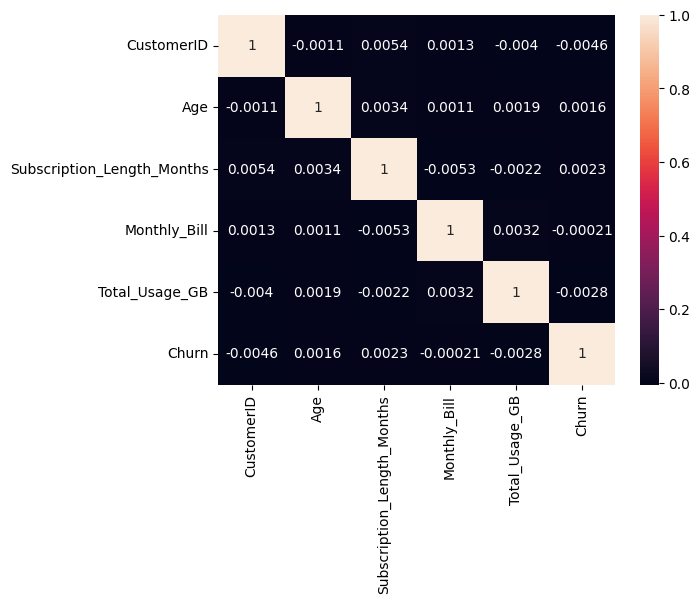

In [4]:
sns.heatmap(data=df.corr(),annot=True)

In [6]:
df['Monthly_Bill'] = df['Monthly_Bill'].astype(int)

In [7]:
##Name and CustomerID are related to each other
df.drop(['Name'],axis=1,inplace=True)

In [8]:
##OHE on object type features
Gender_OHE=df['Gender']
Gender_OHE=pd.get_dummies(Gender_OHE, drop_first=True)
Gender_OHE.head()

,Male
0,1
1,0
2,0
3,0
4,0


In [9]:
Location_OHE=df['Location']
Location_OHE=pd.get_dummies(Location_OHE,drop_first=True)
Location_OHE.head()

,Houston,Los Angeles,Miami,New York
0,0,1,0,0
1,0,0,0,1
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [10]:
df_final=pd.concat([df,Gender_OHE,Location_OHE],axis=1)

In [11]:
df_final

,CustomerID,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Male,Houston,Los Angeles,Miami,New York
0,1,63,Male,Los Angeles,17,73,236,0,1,0,1,0,0
1,2,62,Female,New York,1,48,172,0,0,0,0,0,1
2,3,24,Female,Los Angeles,5,85,460,0,0,0,1,0,0
3,4,36,Female,Miami,3,97,297,1,0,0,0,1,0
4,5,46,Female,Miami,19,58,266,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,33,Male,Houston,23,55,226,1,1,1,0,0,0
99996,99997,62,Female,New York,19,61,351,0,0,0,0,0,1
99997,99998,64,Male,Chicago,17,96,251,1,1,0,0,0,0
99998,99999,51,Female,New York,20,49,434,1,0,0,0,0,1


In [12]:
##deleting unnecessary columns
df_final.drop(['CustomerID','Gender','Location'],axis=1,inplace=True)

<AxesSubplot: >

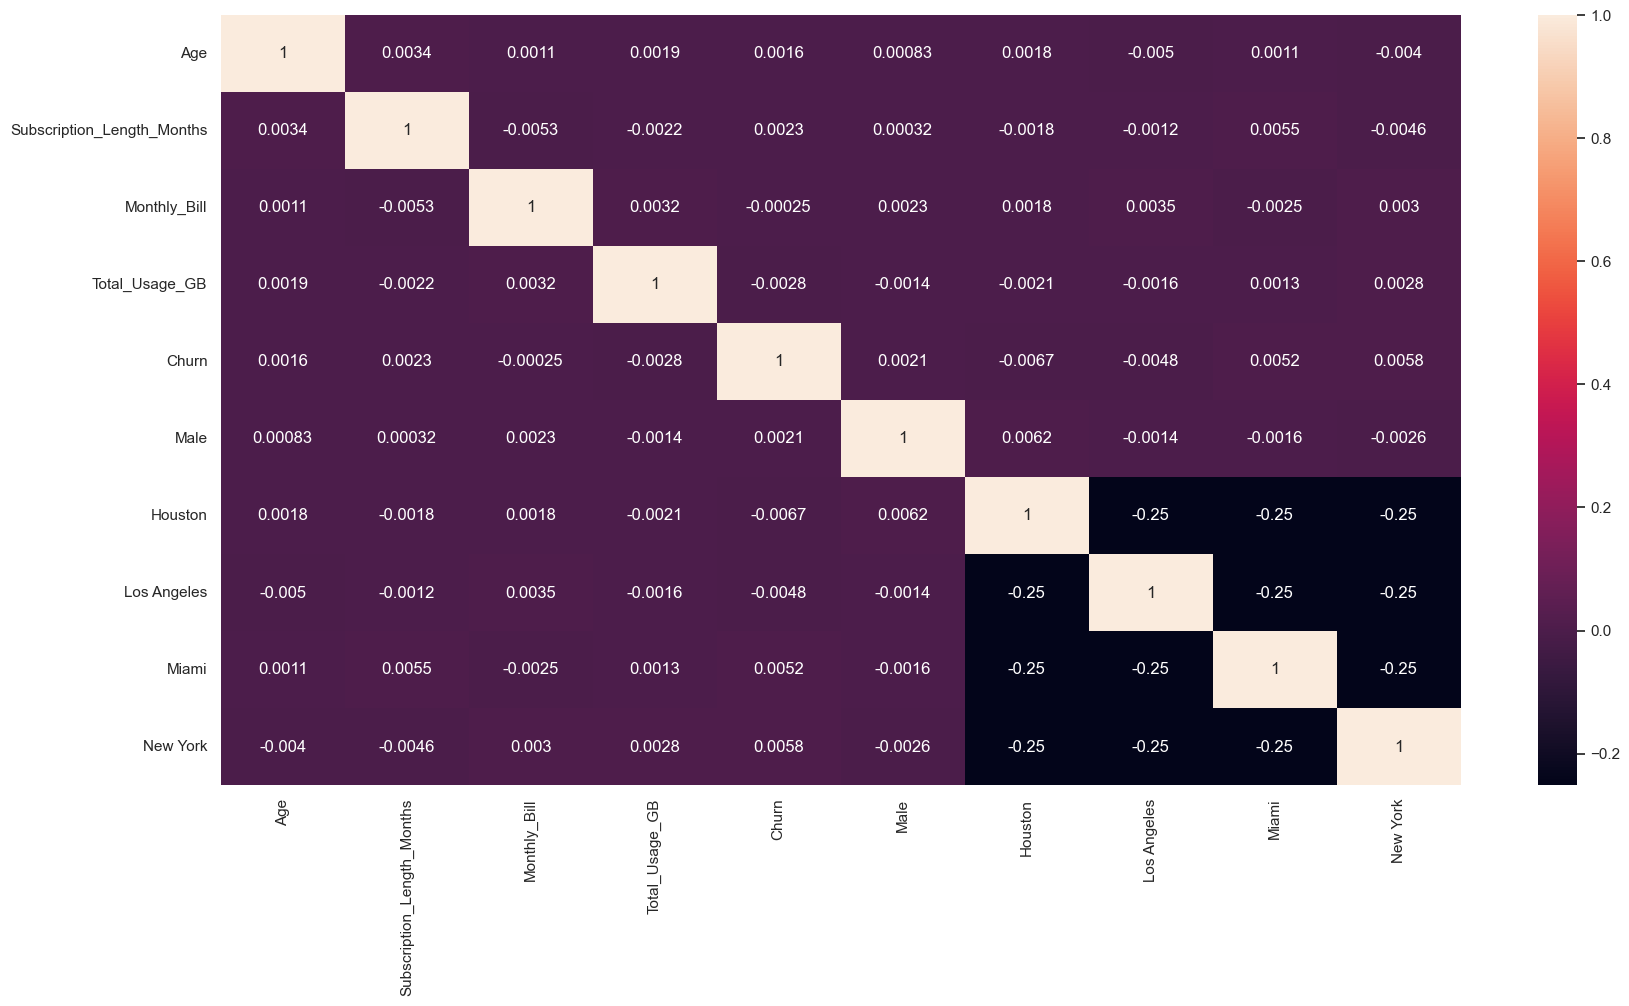

In [13]:
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(data=df_final.corr(),annot=True)

In [14]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Age                         100000 non-null  int64
 1   Subscription_Length_Months  100000 non-null  int64
 2   Monthly_Bill                100000 non-null  int32
 3   Total_Usage_GB              100000 non-null  int64
 4   Churn                       100000 non-null  int64
 5   Male                        100000 non-null  uint8
 6   Houston                     100000 non-null  uint8
 7   Los Angeles                 100000 non-null  uint8
 8   Miami                       100000 non-null  uint8
 9   New York                    100000 non-null  uint8
dtypes: int32(1), int64(4), uint8(5)
memory usage: 3.9 MB


In [15]:
X=df_final.drop(['Churn'],axis=1)

In [16]:
Y=df_final['Churn']

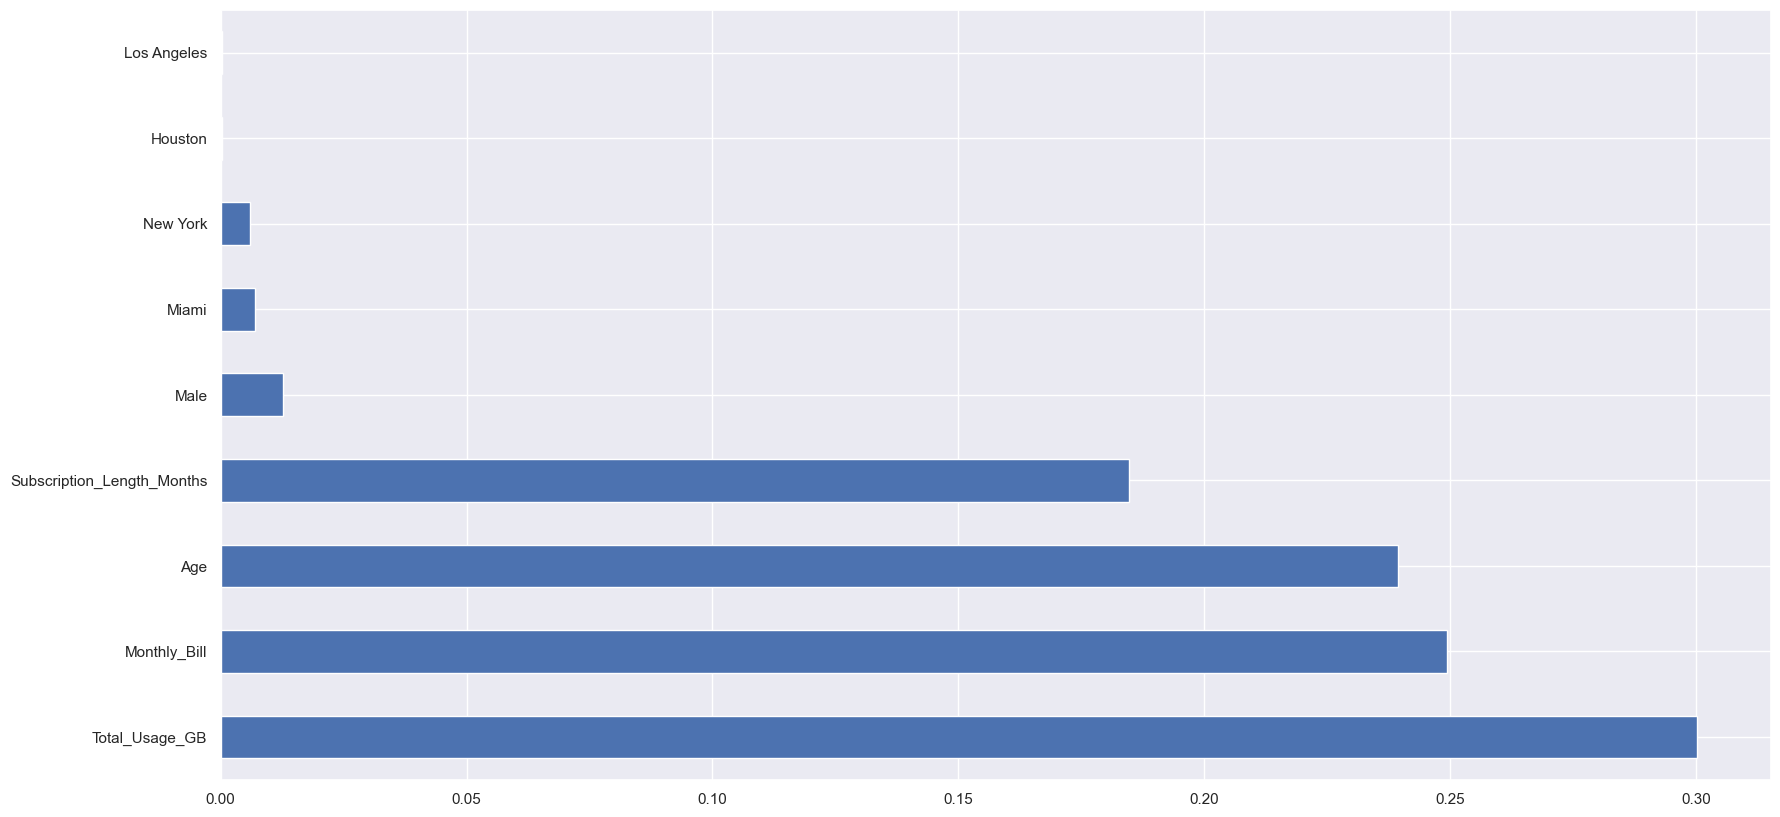

In [17]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, Y)

feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [18]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [19]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [20]:
poly = PolynomialFeatures(degree=4)
X_train = poly.fit_transform(x_train)
X_test = poly.transform(x_test)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
model_lr=LogisticRegression()

model_lr.fit(X_train,y_train)

LogisticRegression()

In [23]:
y_pred_lr=model_lr.predict(X_test)

In [24]:
model_lr.score(X_test,y_test)

0.4978

In [25]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('Accuracy: ',accuracy_score(y_test,y_pred_lr))
print('Precision: ',precision_score(y_test,y_pred_lr))
print('Recall: ',recall_score(y_test,y_pred_lr))
print('F1 score: ',f1_score(y_test,y_pred_lr))

Accuracy:  0.4978
Precision:  0.4936103896103896
Recall:  0.47888317709908274
F1 score:  0.48613527064360995


In [26]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_lr, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.505    0.49575  0.49875  0.49575  0.494375 0.5      0.498125 0.496125
 0.5035   0.499375]


In [31]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.494375, 0.498675, 0.505)

In [ ]:
##Accuracy is in between 49.43% to 50.5%

In [30]:
##Saving Model
import pickle
file = open('CustChurn.pkl', 'wb')

# dump information to that file
pickle.dump(model_lr, file)


In [32]:
model = open('CustChurn.pkl','rb')
lr = pickle.load(model)

EOFError: Ran out of input